# Exploring US Flights Data

The dataset, used for this project, can be found in [Airline On-Time Performance Data](https://www.transtats.bts.gov/Tables.asp?DB_ID=120&DB_Name=Airline%20On-Time%20Performance%20Data&DB_Short_Name=On-Time#) link.

---

> Burcin Sarac <br />
> M.Sc. Business Analytics FT-18 <br >

In [336]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
os.chdir("E:/dersler/Practicum 1/assignment")

In [24]:
flights = pd.read_csv("flights.csv", parse_dates=['FL_DATE', 'DEP_TIME','ARR_TIME'])

In [14]:
flights.shape

(5674621, 20)

In [19]:
flights.head()

,FL_DATE,TAIL_NUM,CARRIER,ORIGIN,ORIGIN_CITY_NAME,DEST,DEST_CITY_NAME,DEP_TIME,DEP_DELAY,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 19
0,2017-01-01,N3CGAA,AA,DEN,"Denver, CO",PHX,"Phoenix, AZ",1135,-10.0,1328,-17.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-01-01,N3CGAA,AA,PHX,"Phoenix, AZ",PDX,"Portland, OR",1502,-8.0,1653,-8.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2017-01-01,N3EVAA,AA,DCA,"Washington, DC",MIA,"Miami, FL",0646,-13.0,0930,-14.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2017-01-01,N3NAAA,AA,MIA,"Miami, FL",LGA,"New York, NY",1402,-3.0,1646,-14.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2017-01-01,N3FCAA,AA,PHX,"Phoenix, AZ",DEN,"Denver, CO",2310,16.0,0107,28.0,0.0,NaN,0.0,0.0,0.0,12.0,0.0,16.0,NaN


## Question 1

Since the DEP_DELAY column shows the difference in minutes between scheduled and actual departure time and early departures shown with negative numbers, I calculate the probability of delay in a particular airport mentioned at "ORIGIN" column, by using DEP_DELAY column data. For calculating this probability, I first group by the data into Departure airports(ORIGIN) by using groupby() function and I count all positive values(occured delays) and divide it to the number of all delay data by airport. When I use DEP_DELAY, I saw that there were some Null values, it seems they were mostly caused by cancelled flights. I tried calculations both dropping and keeping this Null values and it causes slightly change in mean, median and probabity values, which may lead me to draw wrong conclusions. So I decided to drop all Null values before calculations with using notnull() at all questions. 

After that, I dropped %1 of airports in terms of the lowest number of departures by using quantile function. 4 of total 320 locations dropped according to this criteria. 

After all, I merged these two calculations by matching ORIGIN data using merge() function in pandas. I use left join at this merging stage to avoid to get back the outlier data, which was dropped at the previous step. In other words, I keep ORIGIN data from dropped dataset and match the values in this column with the probabilities. With this, unmatched ORIGIN values, which are still kept in probability dataset, will drop automatically. 

At last, I again use groupby() function in ORIGIN to split the row data into groups and calculate mean and median of each airport(ORIGIN). And I merge these values with the previously created data frame to collect probability, mean and median of delays in every single airport.

In [428]:
delayprob = (flights.loc[(flights.DEP_DELAY>0) &(flights.DEP_DELAY.notnull())].groupby("ORIGIN").DEP_DELAY.count()/flights.loc[flights.DEP_DELAY.notnull()].groupby("ORIGIN").DEP_DELAY.count()).sort_values(ascending=False)

In [439]:
delayprob

ORIGIN
SWO    1.000000
TKI    1.000000
GGG    0.833333
MVY    0.668085
UST    0.600000
ACK    0.562986
HYA    0.559140
BQN    0.548326
DAL    0.526197
HOU    0.501605
BPT    0.500000
OTH    0.484211
MDW    0.479777
OAK    0.479249
GUM    0.450549
WYS    0.449782
ADK    0.438776
SUX    0.428571
LAX    0.427414
MMH    0.426667
LAS    0.422838
STL    0.412243
FLL    0.410455
STS    0.410305
BUR    0.401379
SWF    0.398292
SFO    0.397707
BWI    0.397331
IAG    0.396040
APN    0.389439
         ...   
COU    0.174267
GCC    0.173173
PIH    0.172979
CLL    0.172734
BET    0.172377
LAR    0.171334
FLG    0.170862
MFE    0.169838
RKS    0.169440
HYS    0.166392
DRO    0.165767
COD    0.163952
HIB    0.161631
RHI    0.160109
FSM    0.159449
GFK    0.155942
ROW    0.150655
BTM    0.143939
GTF    0.141777
TXK    0.138889
BIL    0.135160
INL    0.132901
GCK    0.132597
LCH    0.130471
HLN    0.125895
HOB    0.125612
CPR    0.123288
GJT    0.117829
BRO    0.112069
LWS    0.086551
Name: DEP_DELAY, 

In [446]:
origin = flights['ORIGIN'].value_counts()

In [341]:
origincutted = origin.loc[origin>origin.quantile(0.01)]

In [342]:
origincutted.count()

316

In [343]:
origincutted = origincutted.reset_index()

In [344]:
origincutted.columns = ['ORIGIN','TotalFlight']

In [429]:
delaysmerged = pd.merge(origincutted,delayprob.to_frame('probofdelay'),how='left', on='ORIGIN')

In [430]:
delaysmerged.head()

,ORIGIN,TotalFlight,probofdelay
0,ATL,364655,0.359352
1,ORD,266460,0.334790
2,DEN,223165,0.366954
3,LAX,214297,0.427414
4,DFW,181208,0.360143


In [440]:
delaysmerged.shape

(316, 3)

In [431]:
flights.loc[flights.DEP_DELAY.notnull()].groupby("ORIGIN").DEP_DELAY.mean().sort_values().head(3)

ORIGIN
YAK   -6.954738
BET   -5.388651
DLG   -5.285714
Name: DEP_DELAY, dtype: float64

In [432]:
flights.loc[flights.DEP_DELAY.notnull()].groupby("ORIGIN").DEP_DELAY.median().sort_values().head(3)

ORIGIN
YAK   -14.0
WRG   -12.0
CDV   -12.0
Name: DEP_DELAY, dtype: float64

In [434]:
groupmean = flights.loc[flights.DEP_DELAY.notnull()].groupby("ORIGIN").DEP_DELAY.mean()

In [435]:
delaysmerged2 = pd.merge(delaysmerged,groupmean.to_frame('meanofdelay'),how='left', on='ORIGIN')

In [436]:
groupmedian = flights.loc[flights.DEP_DELAY.notnull()].groupby("ORIGIN").DEP_DELAY.median()

In [437]:
delaysmerged2 = pd.merge(delaysmerged2,groupmedian.to_frame('medianofdelay'),how='left', on='ORIGIN').sort_values(by=['probofdelay'], ascending=False)

In [438]:
delaysmerged2.head()

,ORIGIN,TotalFlight,probofdelay,meanofdelay,medianofdelay
293,MVY,241,0.668085,34.293617,11.0
310,UST,66,0.600000,59.369231,14.0
266,ACK,665,0.562986,30.203733,4.0
305,HYA,94,0.559140,17.182796,2.0
182,BQN,1710,0.548326,21.129501,3.0


It seems from results that, MVY airport has the highest probability with the ratio of 66% of flights delayed in departure. However it can be said from means of delay for example, the flight departures from UST airport has 60% probability of delay, however if it delays, the possible delay time is longer than MVY. On the other hand if HYA airport is taken into account, there is 55% posibility of departure delay occured, but the delay times were shorter. 

## Question 2

This time, I use same codes only changing groupby column into Carrier for checking probability that a flight operated by the airline has a delay. 

In [293]:
delayprobbycr = (flights.loc[(flights.DEP_DELAY>0)&(flights.DEP_DELAY.notnull())].groupby("CARRIER").DEP_DELAY.count()/flights.groupby("CARRIER").DEP_DELAY.count()).sort_values(ascending=False)

In [294]:
delayprobbycr

CARRIER
WN    0.468958
VX    0.413506
B6    0.410006
F9    0.363760
AA    0.319286
UA    0.318173
NK    0.312332
DL    0.307152
EV    0.286598
HA    0.285814
AS    0.270324
OO    0.266412
Name: DEP_DELAY, dtype: float64

In [311]:
delayprobbycr = delayprobbycr.reset_index()

In [315]:
delayprobbycr.columns = ['CARRIER','probofdelay']

In [316]:
delayprobbycr

,CARRIER,probofdelay
0,WN,0.468958
1,VX,0.413506
2,B6,0.410006
3,F9,0.363760
4,AA,0.319286
5,UA,0.318173
6,NK,0.312332
7,DL,0.307152
8,EV,0.286598
9,HA,0.285814


In [305]:
crmean = flights.loc[flights.DEP_DELAY.notnull()].groupby("CARRIER").DEP_DELAY.mean().sort_values(ascending=False)

In [306]:
crmean.head(4)

CARRIER
B6    16.582982
VX    13.219399
EV    12.689932
F9    12.127640
Name: DEP_DELAY, dtype: float64

In [307]:
crmedian = flights.loc[flights.DEP_DELAY.notnull()].groupby("CARRIER").DEP_DELAY.median().sort_values(ascending=False)

In [308]:
crmedian.head(3)

CARRIER
WN    0.0
VX   -2.0
F9   -2.0
Name: DEP_DELAY, dtype: float64

In [323]:
delaysbycr = pd.merge(delayprobbycr,crmean.to_frame('meanofdelay'),how='left', on='CARRIER')

In [325]:
delaysbycr = pd.merge(delaysbycr,crmedian.to_frame('medianofdelay'),how='left', on='CARRIER')

In [327]:
airlines = pd.read_csv("L_UNIQUE_CARRIERS.csv")

In [330]:
airlines.head(2)

,Code,Description
0,02Q,Titan Airways
1,04Q,Tradewind Aviation


In [331]:
delaysbycr = pd.merge(delaysbycr,airlines,how='left', left_on='CARRIER',right_on='Code')

In [335]:
delaysbycr

,CARRIER,probofdelay,meanofdelay,medianofdelay,Code,Description
0,WN,0.468958,10.248374,0.0,WN,Southwest Airlines Co.
1,VX,0.413506,13.219399,-2.0,VX,Virgin America
2,B6,0.410006,16.582982,-2.0,B6,JetBlue Airways
3,F9,0.363760,12.127640,-2.0,F9,Frontier Airlines Inc.
4,AA,0.319286,8.180574,-3.0,AA,American Airlines Inc.
5,UA,0.318173,9.484484,-3.0,UA,United Air Lines Inc.
6,NK,0.312332,10.171258,-4.0,NK,Spirit Air Lines
7,DL,0.307152,8.497947,-2.0,DL,Delta Air Lines Inc.
8,EV,0.286598,12.689932,-4.0,EV,ExpressJet Airlines Inc.
9,HA,0.285814,1.401808,-3.0,HA,Hawaiian Airlines Inc.


From the results it seems that Southwest Airlines has the highest delay probability in departure. Yet, according to the mean of departure delays with them shows that, delay times were shorter than the some of other airways, which have lower probability of delay. On the other hand, Alaska Airlines delayed in 27% of its departures and the average delay time was around 2.46, which was one of the best ratios.  

## Question 3

This histogram shows the distribution of departures for airports. That is, the x-axis is bins containing flights and the y-axis is the number of airports with departing flights in each particular bin.

I created "origin" data to draw a histogram with only filtering 'ORIGIN' column via value_counts() function. So I can see the the flight numbers in terms of departure airports. And then I used this dataset to create a histogram with .hist() function. And I also add labels and title for the graph.

In [377]:
origin = flights['ORIGIN'].value_counts()

Text(0.5,1,' Distribution of Departures for Airports')

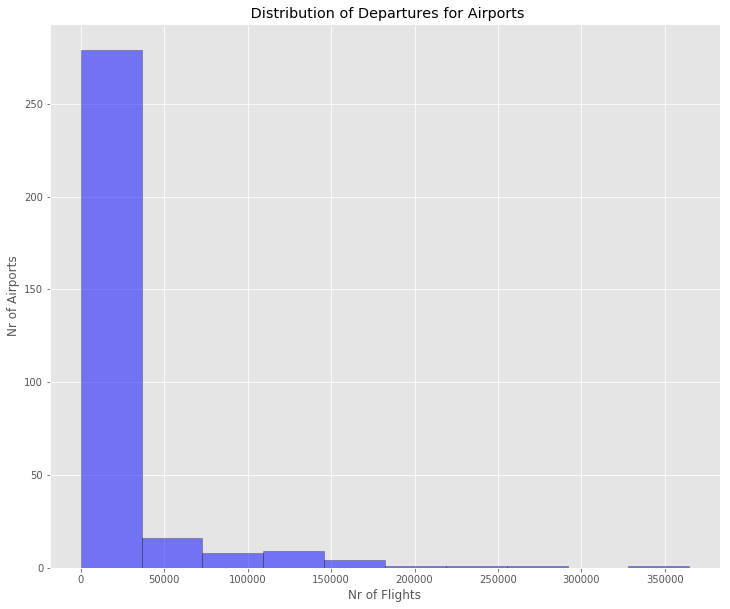

In [452]:
origin.hist(color='blue', edgecolor='black', 
             alpha=0.5, figsize=(12, 10))
plt.xlabel('Nr of Flights')
plt.ylabel('Nr of Airports')
plt.title(' Distribution of Departures for Airports')

It can be seen from graph that, most of the airports, which is around 260, have less than 50 thousand departing flights in 2017, and there are a few outlier airports, which have more than 300 thousand departing flights only in 2017. 

## Question 4

This time, I will create a plot shows the number of flights and the number of delayed flights per month of year. With this I aim to check the distribution of delayed departures by month. 

For drawing this plot, I decide to create a new column which includes only month data. Since I read my csv data with using parse_dates function for FL_DATE column inside read_csv() command, it allows me to shape the dates as Months, years and even days with only a single command. And this time I used dt.to_period('M') to create month column from that FL_DATE column. 

After creating new column, I use groupby() again in the data by grouping "month" column for both delayed flights and all flights numbers. And then I concatenate them with again using merge() function. This command only works with dataframes, so I first reset indexes of that newly created datasets and rename their column names. After all I use to_frame() command to merge the datasets added into the merge command with a specific column name. 

In [463]:
flights['month'] = pd.to_datetime(flights['FL_DATE']).dt.to_period('M')

In [464]:
flights.tail()

,FL_DATE,TAIL_NUM,CARRIER,ORIGIN,ORIGIN_CITY_NAME,DEST,DEST_CITY_NAME,DEP_TIME,DEP_DELAY,ARR_TIME,...,CANCELLED,CANCELLATION_CODE,DIVERTED,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 19,month
5674616,2017-12-31,N705SW,WN,TUS,"Tucson, AZ",LAX,"Los Angeles, CA",1616,26.0,1653,...,0.0,NaN,0.0,4.0,0.0,0.0,0.0,19.0,NaN,2017-12
5674617,2017-12-31,N463WN,WN,TUS,"Tucson, AZ",MDW,"Chicago, IL",0843,-7.0,1251,...,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2017-12
5674618,2017-12-31,N956WN,WN,TUS,"Tucson, AZ",SAN,"San Diego, CA",1451,1.0,1459,...,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2017-12
5674619,2017-12-31,N222WN,WN,TUS,"Tucson, AZ",SAN,"San Diego, CA",1038,13.0,1049,...,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2017-12
5674620,2017-12-31,N488WN,WN,TUS,"Tucson, AZ",SAN,"San Diego, CA",0800,-5.0,0812,...,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2017-12


In [467]:
delayedbymonth = flights.loc[(flights2.DEP_DELAY>0)&(flights.DEP_DELAY.notnull())].groupby("month").DEP_DELAY.count()

In [489]:
delayedbymonth.reset_index()

,month,DEP_DELAY
0,2017-01,168679
1,2017-02,123753
2,2017-03,167523
3,2017-04,163216
4,2017-05,177062
5,2017-06,197341
6,2017-07,196822
7,2017-08,188299
8,2017-09,124503
9,2017-10,145727


In [470]:
flightbymonth = flights.loc[(flights.DEP_DELAY.notnull())].groupby("month").DEP_DELAY.count()

In [485]:
flightbymonth.reset_index()
flightbymonth.columns =['month', 'NumberofFlights']

In [491]:
flights_delays = pd.merge(flightbymonth.to_frame('NumberofFlights'),delayedbymonth.to_frame('NumberofDelays') ,how='left', on='month')

In [492]:
flights_delays

,NumberofFlights,NumberofDelays
month,,
2017-01,441131,168679
2017-02,404205,123753
2017-03,480070,167523
2017-04,460931,163216
2017-05,482444,177062
2017-06,488887,197341
2017-07,503313,196822
2017-08,499444,188299
2017-09,443384,124503


Text(0.5,1,'All Flights & Delayed Flights by Month')

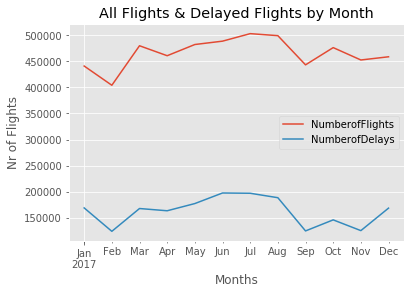

In [524]:
flights_delays.plot()
plt.xlabel('Months')
plt.ylabel('Nr of Flights')
plt.title('All Flights & Delayed Flights by Month')

From the graph it can be said that, the departure delays only differentiates on December in a negative way, in other words departure delays don't affected from monthly changes except December. On December it seems that, the flights delayed more than general trend. And there is a slight change than regular trend on March and October, it means delays occured less than expected. 

## Question 5

Lastly, I try to show for each possible origin and destination, which airline has the best performance, in terms of mean departure delay. For creating this table, I used again groupby() function, but this time with three columns(ORIGIN,DEST,CARRIER) inside this command. This filter shows me best possible airlines in terms of average delay times in specific departure and arrival destinations. 

In [534]:
flights.loc[(flights.DEP_DELAY.notnull())].groupby(["ORIGIN","DEST","CARRIER"]).DEP_DELAY.mean().sort_values()

ORIGIN  DEST  CARRIER
RHI     IMT   OO          -33.676471
PDX     OKC   OO          -32.000000
HIB     INL   OO          -25.250000
PHL     ISP   F9          -16.000000
MSN     SFO   UA          -16.000000
SAT     MCO   F9          -14.000000
SIT     ANC   AS          -13.375000
BTV     IAD   EV          -13.000000
OMA     SFO   UA          -12.000000
MSN     IAD   UA          -11.500000
SDF     BOS   DL          -11.000000
IAH     BOS   AA          -11.000000
MOB     IAH   OO          -11.000000
PIA     DTW   EV          -11.000000
GJT     ATL   OO          -11.000000
STL     IAD   EV          -11.000000
MYR     LGA   EV          -10.000000
DCA     DTW   OO          -10.000000
CLE     MSN   EV          -10.000000
MKE     IAH   UA          -10.000000
        CLE   OO          -10.000000
LNK     MKE   EV          -10.000000
LGA     MHT   EV           -9.200000
DTW     DCA   OO           -9.000000
MSN     CLE   EV           -9.000000
IAH     MSN   UA           -9.000000
LGA     ORF   DL

It is hard to tell something for all destinations but for example, for flights, which depart from RHI airport and arrive to IMT directly, best option seems Skywest Airlines(OO) if only the departure delay times taken into account. From this table best possible airline option for all destinations can be interpreted. And also it can be filtered by using .loc function again to check best possible option in a specific route. 